<a href="https://colab.research.google.com/github/cristobal-trujillo/MachineLearning/blob/RegresionLinealAutompg/RegresionLinealAutompg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="white")
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, roc_curve, precision_score, recall_score

Informacion de la database

In [ ]:
mpg = sns.load_dataset("mpg")
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Eliminacion de columnas 'origin' y 'name' las cuales no poseen datos relevantes para el entrenamiento y la predicción del modelo

In [ ]:
mpg = mpg.drop(['origin', 'name'], axis=1)

\Instruccion para eliminar filas nulas


In [ ]:
new_ds=mpg.dropna()

Matriz de coorrelación, se quito de la lista el atributo del nombre y origin debido a que no presentaba un aporte para esta.

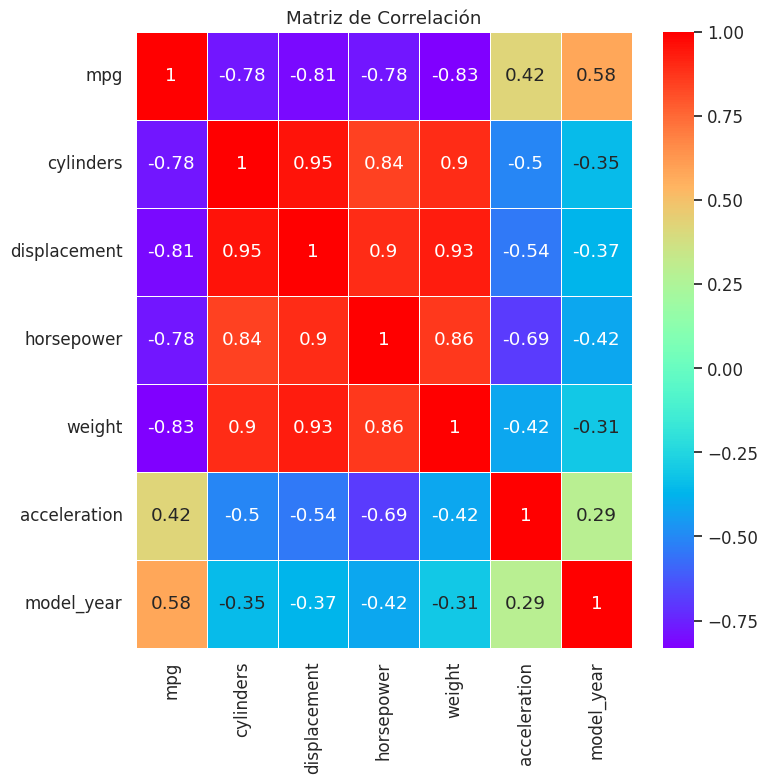

In [ ]:
corr = new_ds.corr()
plt.figure(figsize=(8,8))
sns.set(font_scale=1.1)
sns.heatmap(data=corr,annot=True,cmap='rainbow',linewidth=0.5)
plt.title('Matriz de Correlación')
plt.show();

3 Regresion lineal entrenamiento

Definicion de X e y para el entrenamiento

In [ ]:
X=new_ds[new_ds.columns[1:-1]]
y=new_ds['mpg']

Definicion de X de entrenamiento e y de entrenamiento y X de test e y de test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Escalacion de datos de X_train y entrenamiento del modelo

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Usar regresion lineal para entrenar el modelo con X e y de entrenamiento

In [ ]:
linreg=LinearRegression(n_jobs=-1)
linreg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

Realizacion de predicción con la X de test

In [ ]:
lin_pred=linreg.predict(X_test)
cv_lin_reg=cross_val_score(linreg, X_train, y_train, cv=10).mean()

**Desempeño del modelo entrenado en el cual se muestran las siguientes metricas.**

**MSE**: Mide el promedio de los cuadrados de los errores es decir, la diferencia cuadrática promedio entre los valores estimados y el valor real.

**MAE**: Es una especie de media aritmetica de los errores absolutos

**Cross-Validation accuracy**: Método de remuestreo que utiliza diferentes partes de los datos para probar y entrenar un modelo en diferentes iteraciones.

**Accuracy**: Es la exactitud de precisión del modelo.

In [ ]:
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, lin_pred))

print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_test, lin_pred))

print('Cross-validation accuracy: %0.1f' % (cv_lin_reg*100),'%')

print('Accuracy: %.1f' % (linreg.score(X_test, y_test)*100),'%')

Mean squared error (MSE): 19.10
Mean absolute error (MAE): 3.35
Cross-validation accuracy: 70.4 %
Accuracy: 64.3 %


**Graficos de dispersion de los distintos**

El siguiente grafico de dispersión muestra la dispersion que existe entre el mpg obtenido y las distintas opciones que se utilizar para calcular el mpg.


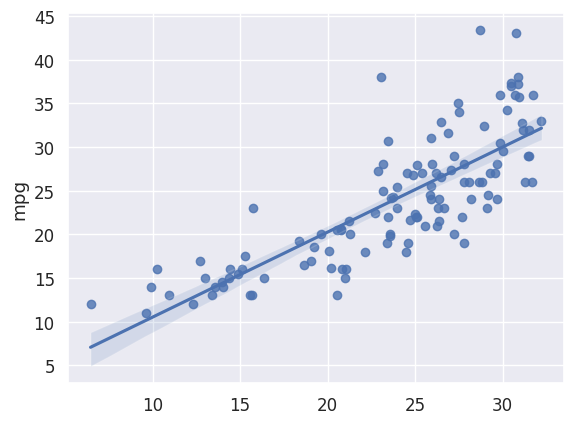

In [ ]:
sns.regplot(x=lin_pred, y=y_test);

**A continuacion se mostraran tambien los graficos de dispersion junto a la linea recta de todos los atributos estudiados.**

**MPG Y HORSEPOWER**

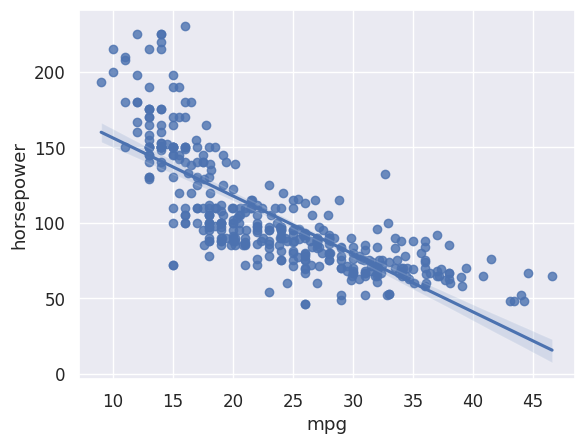

In [ ]:
sns.regplot(x="mpg", y="horsepower", data=mpg);

**MPG Y CYLINDERS**

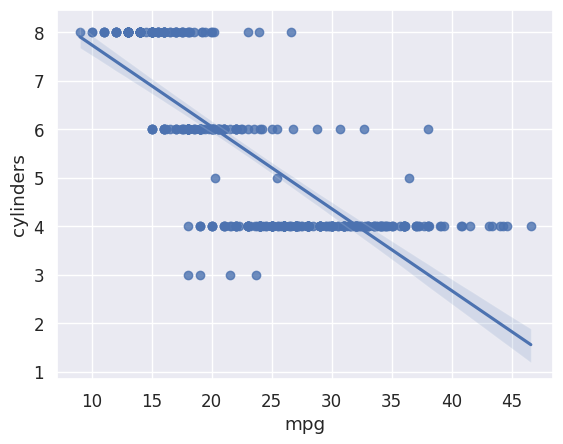

In [ ]:
sns.regplot(x="mpg", y="cylinders", data=mpg);

**MPG Y DISPLACEMENT**

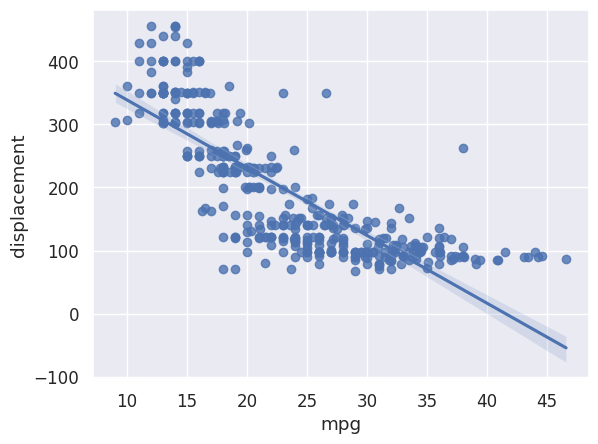

In [ ]:
sns.regplot(x="mpg", y="displacement", data=mpg);

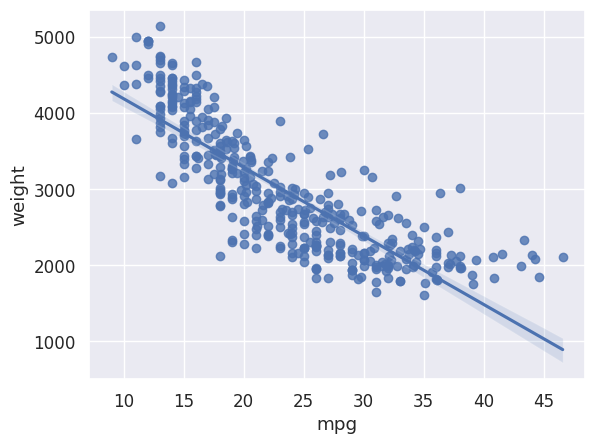

In [ ]:
sns.regplot(x="mpg", y="weight", data=mpg);

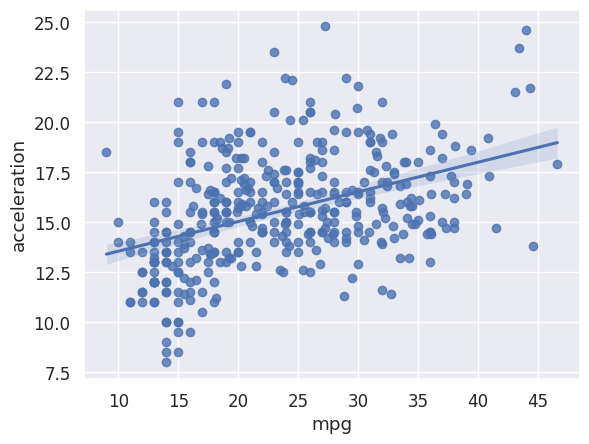

In [ ]:
sns.regplot(x="mpg", y="acceleration", data=mpg);

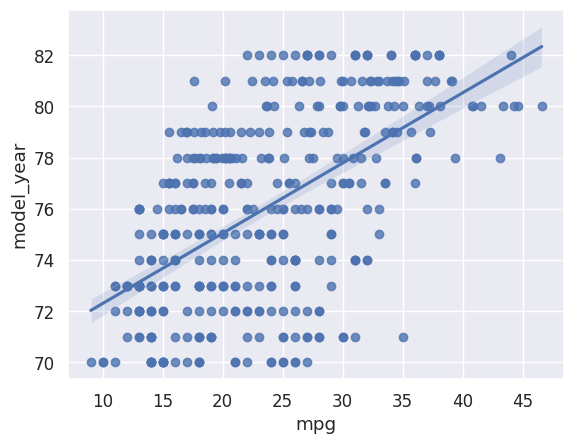

In [ ]:
sns.regplot(x="mpg", y="model_year", data=mpg);

**Para finalizar, en esta representacion de este modelo, se elimino el origen y el nombre, ya que, se llego a la conclusion de que eran irrelevantes para entrenar el modelo.**